In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
import os
from urllib.request import urlretrieve

# 인터넷에 있는 데이터 다운로드
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

# 각 열의 명칭 지정    
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    

# 다운로드받은 데이터를 DataFrame형태로 불러오기
data = pd.read_csv(local_filename, names=names)    

In [3]:
# DataFrame 불러오기
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# 초반 n행 반환
data.head()
# data.head(n=10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# 마지막 n행 반환
data.tail()
# data.tail(n=10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# 데이터 수 세기. axis=0: 가로, axis=1: 세로
data.count()
# data.count(axis=0)
# data.count(axis=1)

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [7]:
# DataFrame.dropna(): missing value를 drop
data = data.dropna()

In [8]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [9]:
# 요약 통계 반환
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


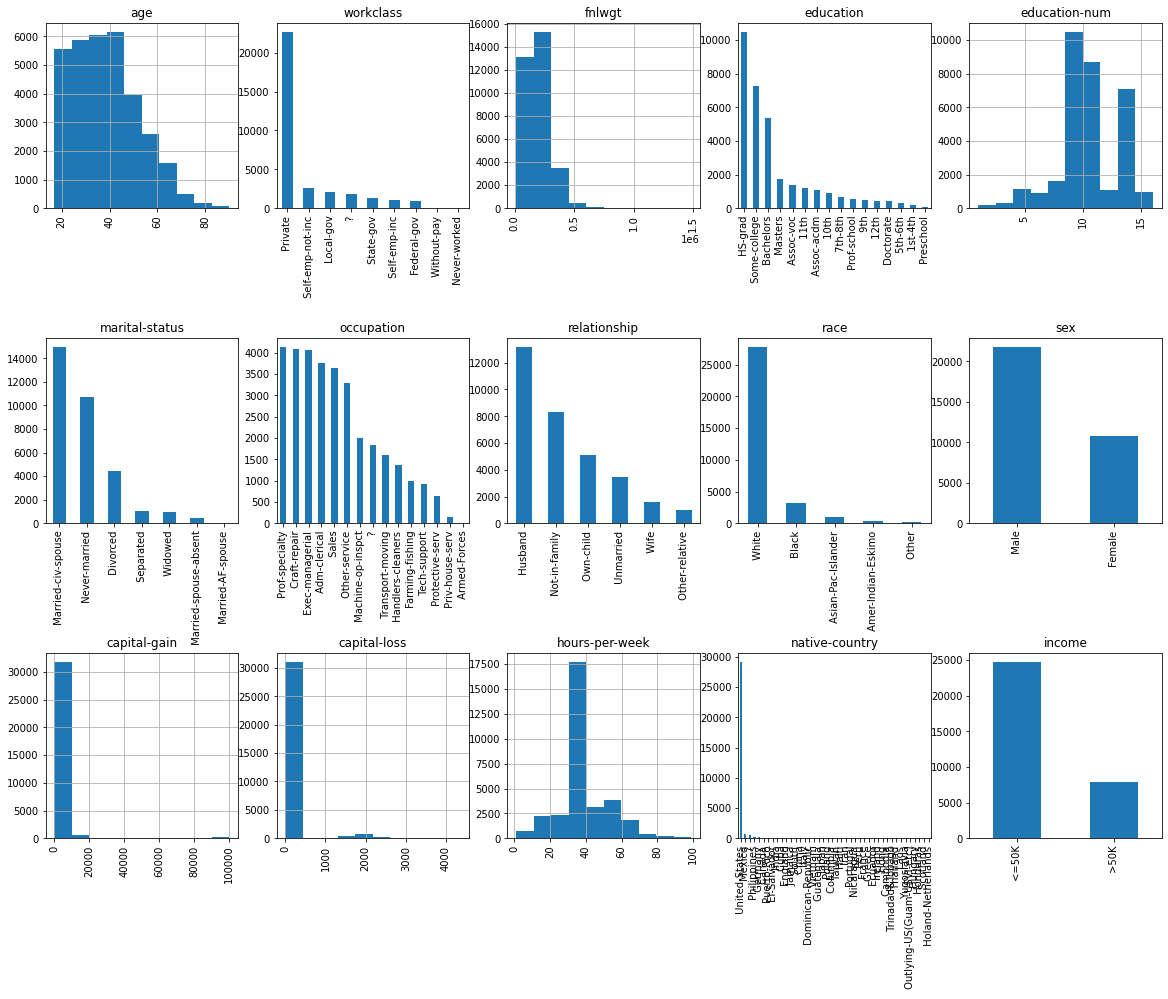

In [10]:
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

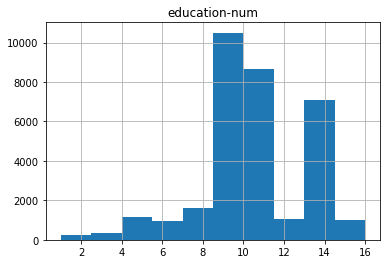

In [11]:
data.hist(column='education-num', bins=10);

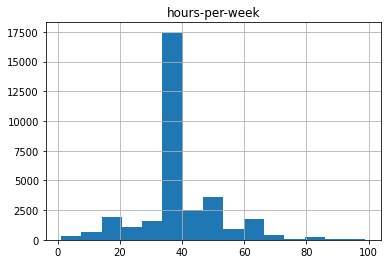

In [12]:
data.hist('hours-per-week', bins=15);

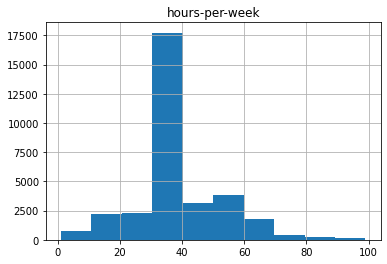

In [13]:
data.hist('hours-per-week', bins=10);

In [14]:
# 숫자 값인 경우에만 동작
data.groupby('income').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [15]:
# 우리가 구분하고자 하는 값을 target_names으로 선언
target_names = data['income'].unique()

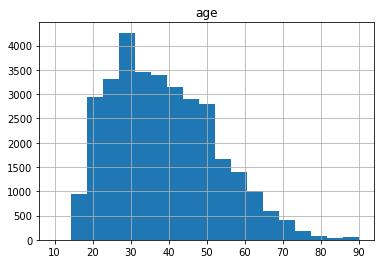

In [16]:
bins = np.linspace(10, 90, 20)
data.hist(column='age', bins=bins);

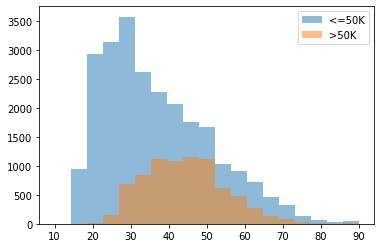

In [17]:
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']


bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best');

In [18]:
data.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


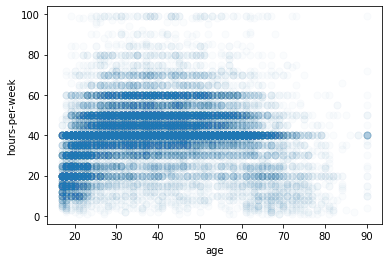

In [19]:
data.plot(x='age', y='hours-per-week', kind='scatter',
          alpha=0.02, s=50);

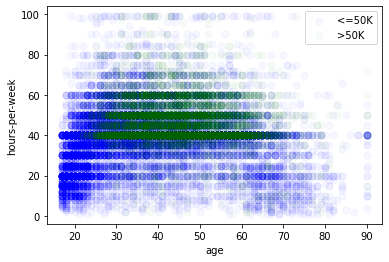

In [20]:
# alpha: 투명도 [0,1]
# s: 사이즈
# c: 색깔(RGB or RGBA 표현 가능)
# marker: . , o v ^ < > * x X + D d | - 등등
# http://matplotlib.org/api/markers_api.html#module-matplotlib.markers 참조
plt.scatter(low_income['age'], low_income['hours-per-week'],
            alpha=0.03, s=50, c='blue', label='<=50K');
plt.scatter(high_income['age'], high_income['hours-per-week'],
            alpha=0.03, s=50, c='green', label='>50K');
plt.legend()
plt.xlabel('age'); plt.ylabel('hours-per-week');

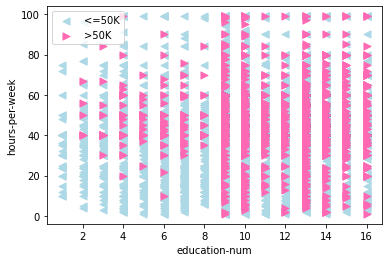

In [21]:
# alpha: 투명도 [0,1]
# s: 사이즈
# c: 색깔(RGB or RGBA 표현 가능)
# marker: . , o v ^ < > * x X + D d | - 등등
# http://matplotlib.org/api/markers_api.html#module-matplotlib.markers 참조
plt.scatter(low_income['education-num'], low_income['hours-per-week'],
            alpha=1, s=50, c='lightblue', marker='<', label='<=50K');
plt.scatter(high_income['education-num'], high_income['hours-per-week'],
            alpha=1, s=50, c='hotpink', marker=">", label='>50K');
plt.legend()
plt.xlabel('education-num'); plt.ylabel('hours-per-week');

In [22]:
# 15개의 column중 'income'은 target으로, 나머지는 features로
target = data['income']
features_data = data.drop('income', axis=1)

# 숫자값을 가지는 feature 뽑기
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')]
numeric_features

numeric_data = features_data[numeric_features]
numeric_data.head(5)

# 기존 features_data에서 숫자 features를 가지는 column을 drop. 남은건 categorical_data
categorical_data = features_data.drop(numeric_features, axis=1)
categorical_data.head(5)

# pd.factorize(): 모델링을 위해 text값을 숫자로 변경할 때 사용
pd.factorize(['a','b','c'])

# 모델링을 위해 text값을 숫자로 변경
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
categorical_data_encoded.head(5)

# 기존 numeric_data와 전처리한 categorical_data_encoded 붙여주기
features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
features.head()

# 다른 방법: one-hot encoding
features2 = pd.get_dummies(features_data)
features2.head()

X = features.values.astype(np.float32)
y = (target.values == ' >50K').astype(np.int32)


In [23]:
# 학습데이터, 테스트데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.2, random_state=0)

print("length of y_train:{}\nlength of y_test: {}".format(len(y_train), len(y_test)))

len(y_test)/(len(y_train)+ len(y_test))

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8)

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation 결과: 평균 {:.4f} 표준편차 +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

length of y_train:26048
length of y_test: 6513
Cross validation 결과: 평균 0.8538 표준편차 +/-0.0035


In [24]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def treeviz(tree, feature_names ,class_names): 
    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data,  
                    feature_names= feature_names,  
                    class_names=class_names,  
                    filled=True, rounded=True,  
                    special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

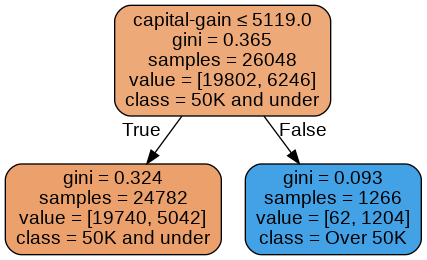

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

feature_names = features.columns
target_names = np.array(['50K and under','Over 50K']) ## 부등호는 에러를 발생시켜 텍스트로 대체

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)
treeviz(clf, feature_names, target_names) 

In [26]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    print("Best validation score: {:.4f}".format(validation_scores_mean[-1]))

Best validation score: 0.5948


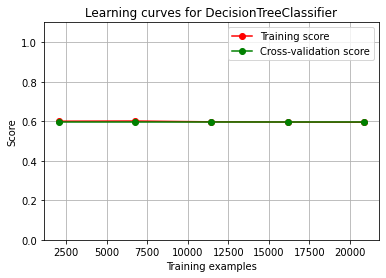

In [27]:
clf = DecisionTreeClassifier(max_depth=1)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8580


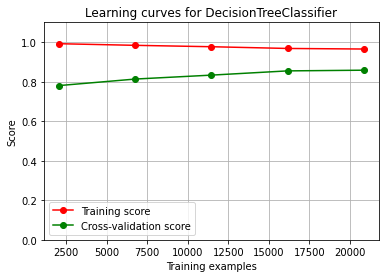

In [28]:
clf = DecisionTreeClassifier(max_depth=15)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8963


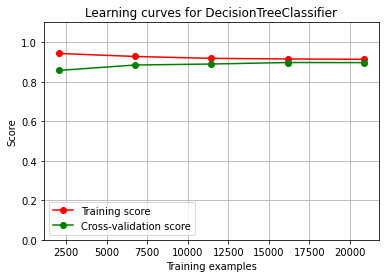

In [29]:
clf = DecisionTreeClassifier(max_depth=8)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8636


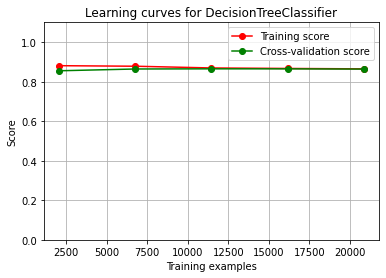

In [30]:
clf = DecisionTreeClassifier(max_depth=4)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

In [31]:
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=5, n_jobs=-1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"
              % (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    
    print("Best test score: {:.4f}".format(np.max(test_scores_mean)))

Best test score: 0.8964


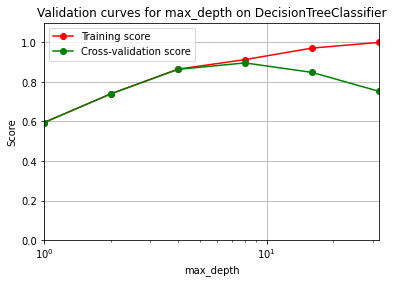

In [32]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32]

plot_validation_curve(clf, X_train, y_train,
                      param_name, param_range, scoring='roc_auc')

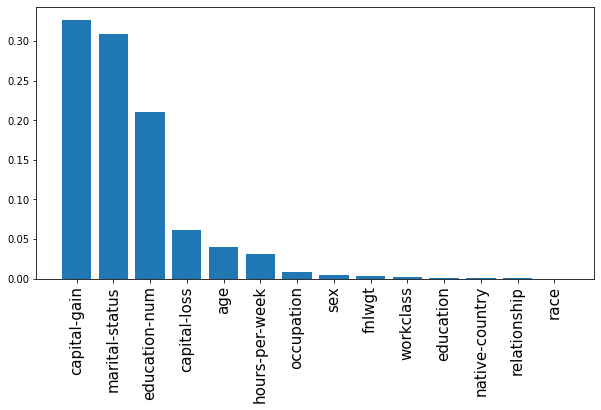

In [33]:
plt.figure(figsize=(10, 5))

clf.fit(X_train, y_train)
ordering = np.argsort(clf.feature_importances_)[::-1]

importances = clf.feature_importances_[ordering]
feature_names = features.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x, feature_names, rotation=90, fontsize=15);